# Analyis on annual operating hours of gasification plants

In [14]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from functions.general.utility import get_project_root
from functions.general.utility import reject_outliers

In [3]:
# General parameters
root_dir = get_project_root()

# Load and display data
data_file = "annual_operating_hours.csv"
data_file_path = os.path.join(root_dir, "data", data_file)
df_source = pd.read_csv(data_file_path)
df = df_source.copy()  # working copy of original dataframe
df

,Value,Units,Country,Reference Year,Reference,Notes
0,8410,hours/year,USA,2007,Process Design and Economics for Conversion of...,NaN
1,7896,hours/year,UK,2009,https://doi.org/10.1016/j.cej.2008.06.014,NaN
2,7200,hours/year,Italy,2015,http://dx.doi.org/10.1016/j.fuproc.2014.11.003,NaN
3,7500,hours/year,Spain,2018,https://doi.org/10.1016/j.wasman.2018.03.039,NaN
4,8600,hours/year,Iran,2018,https://doi.org/10.1016/,NaN
5,7680,hours/year,Italy,2012,http://dx.doi.org/10.1016/j.energy.2012.03.048,NaN
6,8000,hours/year,Mexico,2019,https://doi.org/10.1016/j.energy.2019.116095,NaN
7,6000,hours/year,Poland,2014,https://doi.org/10.1016/j.energy.2014.01.015,NaN
8,8766,hours/year,USA,2020,https://doi.org/10.1016/j.compchemeng.2020.106758,NaN
9,8000,hours/year,UK,2022,https://doi.org/10.1016/j.enconman.2022.115346,NaN


In [5]:
# Hours before rejecting outliers
hours_array_raw = np.array(df["Value"])
hours_array_raw

array([8410, 7896, 7200, 7500, 8600, 7680, 8000, 6000, 8766, 8000, 8000,
       7500, 7896], dtype=int64)

In [6]:
# Hours after rejecting outliers
hours_array_after_rejecting_outliers = reject_outliers(hours_array_raw, 2)
hours_array_after_rejecting_outliers

array([8410, 7896, 7200, 7500, 8600, 7680, 8000, 8766, 8000, 8000, 7500,
       7896], dtype=int64)

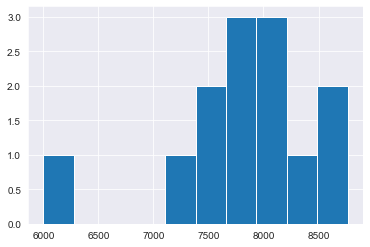

In [7]:
# Plot of raw data
fig, ax = plt.subplots()
ax.hist(hours_array_raw)
plt.show()

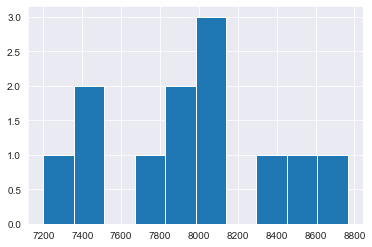

In [8]:
# Plot of data after removing outliers
fig, ax = plt.subplots()
ax.hist(hours_array_after_rejecting_outliers)
plt.show()

In [20]:
# Display stats
print(f"Mean: {np.mean(hours_array_after_rejecting_outliers):.0f}, Std: {np.std(hours_array_after_rejecting_outliers):.0f}, Mode:{int(stats.mode(hours_array_after_rejecting_outliers).mode):.0f}")


Mean: 7954, Std: 443, Mode:8000
